# Bázel (Svájc) időjárás adatainak elemzése

## Adatelőkészítés

Csomagok és adatok betöltése

In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

idojaras = pd.read_csv('Basel.csv', 
                   sep=',',
                   decimal='.')

Belenézünk az adatokba:

In [32]:
idojaras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3962 entries, 0 to 3961
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   variable                   3962 non-null   object
 1   Temperature                3962 non-null   object
 2   Temperature.1              3962 non-null   object
 3   Temperature.2              3962 non-null   object
 4   Relative Humidity          3962 non-null   object
 5   Relative Humidity.1        3962 non-null   object
 6   Relative Humidity.2        3962 non-null   object
 7   Mean Sea Level Pressure    3962 non-null   object
 8   Mean Sea Level Pressure.1  3962 non-null   object
 9   Mean Sea Level Pressure.2  3962 non-null   object
 10  Precipitation Total        3962 non-null   object
 11  Wind Speed                 3962 non-null   object
 12  Wind Speed.1               3962 non-null   object
 13  Wind Speed.2               3962 non-null   object
 14  Wind Dir

#### Adatok forrása: www.meteoblue.com (History+)

In [33]:
idojaras.head(15)

,variable,Temperature,Temperature.1,Temperature.2,Relative Humidity,Relative Humidity.1,Relative Humidity.2,Mean Sea Level Pressure,Mean Sea Level Pressure.1,Mean Sea Level Pressure.2,Precipitation Total,Wind Speed,Wind Speed.1,Wind Speed.2,Wind Direction Dominant
0,unit,°C,°C,°C,%,%,%,hPa,hPa,hPa,mm,km/h,km/h,km/h,°
1,level,2 m elevation corrected,2 m elevation corrected,2 m elevation corrected,2 m,2 m,2 m,MSL,MSL,MSL,sfc,10 m,10 m,10 m,10 m
2,resolution,daily,daily,daily,daily,daily,daily,daily,daily,daily,daily,daily,daily,daily,daily
3,aggregation,Minimum,Maximum,Mean,Minimum,Maximum,Mean,Minimum,Maximum,Mean,Summation,Minimum,Maximum,Mean,None
4,timestamp,Bázel Temperature [2 m elevation corrected],Bázel Temperature [2 m elevation corrected],Bázel Temperature [2 m elevation corrected],Bázel Relative Humidity [2 m],Bázel Relative Humidity [2 m],Bázel Relative Humidity [2 m],Bázel Mean Sea Level Pressure [MSL],Bázel Mean Sea Level Pressure [MSL],Bázel Mean Sea Level Pressure [MSL],Bázel Precipitation Total,Bázel Wind Speed [10 m],Bázel Wind Speed [10 m],Bázel Wind Speed [10 m],Bázel Wind Direction Dominant [10 m]
5,20100101T0000,1.3405286,6.5705285,4.5146947,86.0,95.0,90.416664,990.0,1004.7,994.47076,2.7,3.6,30.096085,12.250545,316.3875
6,20100102T0000,-2.9594715,0.8905287,-0.97238797,58.0,88.0,74.583336,1006.3,1023.9,1017.6375,0.0,14.76439,41.476624,26.46636,277.8863
7,20100103T0000,-3.1394715,1.9105287,-0.8186381,54.0,86.0,70.125,1017.5,1024.1,1020.77496,0.0,1.08,15.815435,6.364649,165.0992
8,20100104T0000,-5.4994717,-0.25947133,-3.2815552,58.0,97.0,83.708336,1013.7,1019.1,1016.1834,0.0,0.71999997,10.495713,5.4365764,340.83054
9,20100105T0000,-7.1094713,-0.41947132,-3.2798882,67.0,95.0,84.208336,1001.6,1013.2,1006.7376,0.0,0.0,12.43434,5.978685,339.09204


A fejléc adatot csak a feljécben szeretnénk látni. Először ehhez átírjuk a fejlécet arra, hogy utaljon az adat tartalmára.

In [34]:
idojaras.columns =['date','MinimumTemperature','MaximumTemperature','MeanTemperature','MinimumRelative Humidity','MaximumRelative Humidity','MeanRelative Humidity','Minimum Sea Level Pressure','Maximum Sea Level Pressure','Mean Sea Level Pressure','SummationPrecipitation Total','MinimumWind Speed','MaximumWind Speed','MeanWind Speed','Wind Direction Dominant']

In [35]:
idojaras.shape

(3962, 15)

Kitöröljük a 0-4 sort. 

In [36]:
idojaras=idojaras.drop(index=[0,1,2,3,4])

In [37]:
idojaras.shape

(3957, 15)

In [38]:
idojaras['date']=idojaras['date'].str[:8]

In [40]:
idojaras.head(10)

,date,MinimumTemperature,MaximumTemperature,MeanTemperature,MinimumRelative Humidity,MaximumRelative Humidity,MeanRelative Humidity,Minimum Sea Level Pressure,Maximum Sea Level Pressure,Mean Sea Level Pressure,SummationPrecipitation Total,MinimumWind Speed,MaximumWind Speed,MeanWind Speed,Wind Direction Dominant
5,20100101,1.3405286,6.5705285,4.5146947,86.0,95.0,90.416664,990.0,1004.7,994.47076,2.7,3.6,30.096085,12.250545,316.3875
6,20100102,-2.9594715,0.8905287,-0.97238797,58.0,88.0,74.583336,1006.3,1023.9,1017.6375,0.0,14.76439,41.476624,26.46636,277.8863
7,20100103,-3.1394715,1.9105287,-0.8186381,54.0,86.0,70.125,1017.5,1024.1,1020.77496,0.0,1.08,15.815435,6.364649,165.0992
8,20100104,-5.4994717,-0.25947133,-3.2815552,58.0,97.0,83.708336,1013.7,1019.1,1016.1834,0.0,0.71999997,10.495713,5.4365764,340.83054
9,20100105,-7.1094713,-0.41947132,-3.2798882,67.0,95.0,84.208336,1001.6,1013.2,1006.7376,0.0,0.0,12.43434,5.978685,339.09204
10,20100106,-4.1294713,1.1705287,-2.0103047,57.0,95.0,82.0,1001.0,1005.1,1002.85834,0.2,0.35999998,22.206486,9.235818,289.85254
11,20100107,-2.7694714,4.2505283,-0.01238814,47.0,100.0,81.791664,1005.5,1009.1,1006.9041,0.0,2.8799999,15.94601,10.361574,135.70297
12,20100108,-2.2494714,2.9105287,-0.41822132,69.0,97.0,84.333336,1002.7,1010.9,1005.9084,4.2,2.1897945,33.371437,20.039835,32.760742
13,20100109,-3.0494714,-0.059471346,-1.6990548,65.0,96.0,82.5,1002.4,1006.7,1003.70416,5.8999996,9.3669195,28.08923,18.277567,18.466568
14,20100110,-4.8694715,-1.2994714,-3.3365552,72.0,95.0,87.083336,1004.4,1016.2,1011.90424,0.4,2.3051248,25.683926,13.811226,309.38153


Megnézzük a 10 legmagasabb max hőmérsékletű napot

In [41]:
idojaras.nlargest(10,'MaximumTemperature')

TypeError: Column 'MaximumTemperature' has dtype object, cannot use method 'nlargest' with this dtype

Oh, nem jó típusként tároltuk a max hőmérséklet adatokat, így nem is tud maximumot keresni rajtuk. Nézzük meg, milyen típusokat használunk és javítsuk a helyteleneket:

In [42]:
idojaras.dtypes

date                            object
MinimumTemperature              object
MaximumTemperature              object
MeanTemperature                 object
MinimumRelative Humidity        object
MaximumRelative Humidity        object
MeanRelative Humidity           object
Minimum Sea Level Pressure      object
Maximum Sea Level Pressure      object
Mean Sea Level Pressure         object
SummationPrecipitation Total    object
MinimumWind Speed               object
MaximumWind Speed               object
MeanWind Speed                  object
Wind Direction Dominant         object
dtype: object

In [43]:
idojaras['date']=idojaras['date'].astype('datetime64')
idojaras['MinimumTemperature']=idojaras['MinimumTemperature'].astype('float64')
idojaras['MaximumTemperature']=idojaras['MaximumTemperature'].astype('float64')
idojaras['MeanTemperature']=idojaras['MeanTemperature'].astype('float64')
idojaras['MinimumRelative Humidity']=idojaras['MinimumRelative Humidity'].astype('float64')
idojaras['MaximumRelative Humidity']=idojaras['MaximumRelative Humidity'].astype('float64')
idojaras['MeanRelative Humidity']=idojaras['MeanRelative Humidity'].astype('float64')
idojaras['Minimum Sea Level Pressure']=idojaras['Minimum Sea Level Pressure'].astype('float64')
idojaras['Maximum Sea Level Pressure']=idojaras['Maximum Sea Level Pressure'].astype('float64')
idojaras['Mean Sea Level Pressure']=idojaras['Mean Sea Level Pressure'].astype('float64')
idojaras['SummationPrecipitation Total']=idojaras['SummationPrecipitation Total'].astype('float64')
idojaras['MinimumWind Speed']=idojaras['MinimumWind Speed'].astype('float64')
idojaras['MaximumWind Speed']=idojaras['MaximumWind Speed'].astype('float64')
idojaras['MeanWind Speed']=idojaras['MeanWind Speed'].astype('float64')
idojaras['Wind Direction Dominant']=idojaras['Wind Direction Dominant'].astype('float64')

In [44]:
idojaras.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3957 entries, 5 to 3961
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          3957 non-null   datetime64[ns]
 1   MinimumTemperature            3957 non-null   float64       
 2   MaximumTemperature            3957 non-null   float64       
 3   MeanTemperature               3957 non-null   float64       
 4   MinimumRelative Humidity      3957 non-null   float64       
 5   MaximumRelative Humidity      3957 non-null   float64       
 6   MeanRelative Humidity         3957 non-null   float64       
 7   Minimum Sea Level Pressure    3957 non-null   float64       
 8   Maximum Sea Level Pressure    3957 non-null   float64       
 9   Mean Sea Level Pressure       3957 non-null   float64       
 10  SummationPrecipitation Total  3957 non-null   float64       
 11  MinimumWind Speed             

Így már meg tudjuk nézni a 10 legmagasabb max hőmérsékletű napot

In [45]:
idojaras.nlargest(10,'MaximumTemperature')

,date,MinimumTemperature,MaximumTemperature,MeanTemperature,MinimumRelative Humidity,MaximumRelative Humidity,MeanRelative Humidity,Minimum Sea Level Pressure,Maximum Sea Level Pressure,Mean Sea Level Pressure,SummationPrecipitation Total,MinimumWind Speed,MaximumWind Speed,MeanWind Speed,Wind Direction Dominant
2016,2015-07-05,23.580528,36.700527,30.022194,30.0,80.0,46.958332,1012.2,1018.8,1015.56244,0.0,2.811690,18.775301,10.913865,165.04643
1308,2013-07-27,23.190529,36.220528,29.645525,23.0,65.0,44.666668,1007.1,1012.4,1009.83740,0.0,4.693826,14.764390,9.888667,126.21470
3468,2019-06-26,23.910528,36.120530,30.493860,38.0,74.0,57.166668,1020.7,1023.1,1021.79156,0.0,1.080000,7.072878,4.394732,80.63654
1314,2013-08-02,21.880530,35.840530,28.261362,26.0,65.0,48.166668,1011.7,1015.9,1013.88745,0.0,3.893995,14.512064,9.250789,128.12420
2049,2015-08-07,21.420528,35.770530,28.555529,28.0,81.0,53.625000,1013.0,1016.3,1014.56244,0.0,1.138420,10.594036,6.560854,119.09479
1625,2014-06-09,21.280529,35.620530,27.695944,19.0,62.0,38.166668,1014.6,1018.6,1016.77496,0.0,3.319036,18.888851,8.440478,138.41658
3497,2019-07-25,20.710530,35.500530,29.299280,35.0,81.0,55.625000,1011.4,1016.3,1013.85420,0.0,5.495161,12.605142,9.536555,102.86203
3496,2019-07-24,20.660528,35.380527,28.689278,32.0,80.0,55.291668,1014.0,1016.9,1015.52075,0.0,0.000000,10.799999,4.821902,119.28673
1269,2013-06-18,22.280529,35.240530,28.911364,29.0,70.0,49.625000,1010.3,1015.6,1012.65010,0.0,2.414954,19.080000,8.542677,86.28160
2014,2015-07-03,24.290530,35.130527,29.535530,32.0,72.0,51.083332,1019.9,1023.2,1021.60420,0.0,4.802999,14.799459,9.836321,113.64038


A biztonság kedvéért ellenőrizzük, hogy minden napra van-e adatunk ebben az oszlopban:

In [46]:
idojaras[idojaras['MaximumTemperature'].isnull()].index.tolist()

[]

Az imént ellenőriztük egy oszlop maximumát és üres adatait. Megnézhetnénk a többi mezőt is, de ez az adattábla megbízható, ellenőrzött forrásból származik; nem tartalmaz rossz és hiányzó adatokat, így azt kaptuk, amire számítottunk. Nem kell adatokat pótolni; esetleges hibás adatokat javítanunk.

Vödrözéses eljárással a maximum napi hőmérséklet adatot 5 egyenlő szélességű vödrökbe osztom:


In [48]:
idojaras['MaximumHomerseklet'] = pd.cut(idojaras.MaximumTemperature, 5, 
                                 labels=['fagyos', 'hideg', 'közepes', 'meleg', 'forró'])
idojaras.head(100)

,date,MinimumTemperature,MaximumTemperature,MeanTemperature,MinimumRelative Humidity,MaximumRelative Humidity,MeanRelative Humidity,Minimum Sea Level Pressure,Maximum Sea Level Pressure,Mean Sea Level Pressure,SummationPrecipitation Total,MinimumWind Speed,MaximumWind Speed,MeanWind Speed,Wind Direction Dominant,MaximumHomerseklet
5,2010-01-01,1.340529,6.570528,4.514695,86.0,95.0,90.416664,990.0,1004.7,994.47076,2.700000,3.600000,30.096085,12.250545,316.387500,hideg
6,2010-01-02,-2.959471,0.890529,-0.972388,58.0,88.0,74.583336,1006.3,1023.9,1017.63750,0.000000,14.764390,41.476624,26.466360,277.886300,fagyos
7,2010-01-03,-3.139471,1.910529,-0.818638,54.0,86.0,70.125000,1017.5,1024.1,1020.77496,0.000000,1.080000,15.815435,6.364649,165.099200,fagyos
8,2010-01-04,-5.499472,-0.259471,-3.281555,58.0,97.0,83.708336,1013.7,1019.1,1016.18340,0.000000,0.720000,10.495713,5.436576,340.830540,fagyos
9,2010-01-05,-7.109471,-0.419471,-3.279888,67.0,95.0,84.208336,1001.6,1013.2,1006.73760,0.000000,0.000000,12.434340,5.978685,339.092040,fagyos
10,2010-01-06,-4.129471,1.170529,-2.010305,57.0,95.0,82.000000,1001.0,1005.1,1002.85834,0.200000,0.360000,22.206486,9.235818,289.852540,fagyos
11,2010-01-07,-2.769471,4.250528,-0.012388,47.0,100.0,81.791664,1005.5,1009.1,1006.90410,0.000000,2.880000,15.946010,10.361574,135.702970,hideg
12,2010-01-08,-2.249471,2.910529,-0.418221,69.0,97.0,84.333336,1002.7,1010.9,1005.90840,4.200000,2.189795,33.371437,20.039835,32.760742,fagyos
13,2010-01-09,-3.049471,-0.059471,-1.699055,65.0,96.0,82.500000,1002.4,1006.7,1003.70416,5.900000,9.366919,28.089230,18.277567,18.466568,fagyos
14,2010-01-10,-4.869472,-1.299471,-3.336555,72.0,95.0,87.083336,1004.4,1016.2,1011.90424,0.400000,2.305125,25.683926,13.811226,309.381530,fagyos


## Nézzünk néhány statisztikai számítást

A napi max hőmérsékletre számoljunk:

In [52]:
idojaras.describe()

,MinimumTemperature,MaximumTemperature,MeanTemperature,MinimumRelative Humidity,MaximumRelative Humidity,MeanRelative Humidity,Minimum Sea Level Pressure,Maximum Sea Level Pressure,Mean Sea Level Pressure,SummationPrecipitation Total,MinimumWind Speed,MaximumWind Speed,MeanWind Speed,Wind Direction Dominant
count,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000
mean,8.104961,16.657790,12.363172,53.221380,86.970179,70.465557,1014.119232,1019.842204,1016.959778,1.439121,3.680337,19.385992,10.981624,201.037330
std,6.452840,7.854794,7.116639,12.548088,7.889762,9.735283,8.604626,7.767204,8.078332,3.390115,4.173747,9.647173,6.425959,96.653855
min,-12.519471,-4.389471,-7.641554,17.000000,45.000000,33.458332,976.100000,982.000000,978.679200,0.000000,0.000000,2.811690,1.334680,0.000000
25%,3.040529,10.560529,6.688029,44.000000,82.000000,63.541668,1009.300000,1015.400000,1012.400100,0.000000,1.080000,12.481153,6.584359,113.682080
50%,8.200529,16.740528,12.459279,53.000000,88.000000,71.041664,1014.600000,1019.600000,1016.962600,0.000000,2.305125,17.414476,9.343167,235.294650
75%,13.130529,22.690529,17.798860,62.000000,93.000000,77.625000,1019.200000,1024.500000,1021.762450,1.200000,4.693826,23.871555,13.294219,273.861850
max,25.820530,36.700527,30.493860,93.000000,100.000000,95.541664,1043.600000,1049.900000,1046.970800,40.000000,36.044970,79.989690,49.958927,360.000000


In [49]:
idojaras.MaximumTemperature.max()

36.700527

In [50]:
idojaras.MaximumTemperature.min()

-4.3894715

In [51]:
idojaras.MaximumTemperature.quantile([0.2, 0.4, 0.6, 0.8, 1])

0.2     9.240529
0.4    14.254529
0.6    19.208530
0.8    23.788530
1.0    36.700527
Name: MaximumTemperature, dtype: float64

Mikor volt 35°C felett a max napi hőmérséklet (legmelegebb napok)?

In [20]:
idojaras[idojaras.MaximumTemperature>35]

,date,MinimumTemperature,MaximumTemperature,MeanTemperature,MinimumRelative Humidity,MaximumRelative Humidity,MeanRelative Humidity,Minimum Sea Level Pressure,Maximum Sea Level Pressure,Mean Sea Level Pressure,SummationPrecipitation Total,MinimumWind Speed,MaximumWind Speed,MeanWind Speed,Wind Direction Dominant,MaximumHomerseklet
1269,2013-06-18,22.280529,35.240530,28.911364,29.0,70.0,49.625000,1010.3,1015.6,1012.65010,0.0,2.414954,19.080000,8.542677,86.281600,forró
1308,2013-07-27,23.190529,36.220528,29.645525,23.0,65.0,44.666668,1007.1,1012.4,1009.83740,0.0,4.693826,14.764390,9.888667,126.214700,forró
1314,2013-08-02,21.880530,35.840530,28.261362,26.0,65.0,48.166668,1011.7,1015.9,1013.88745,0.0,3.893995,14.512064,9.250789,128.124200,forró
1625,2014-06-09,21.280529,35.620530,27.695944,19.0,62.0,38.166668,1014.6,1018.6,1016.77496,0.0,3.319036,18.888851,8.440478,138.416580,forró
2013,2015-07-02,20.780529,35.060528,28.118858,34.0,78.0,55.791668,1018.4,1021.5,1019.40405,0.0,5.116561,12.620554,9.199554,116.829895,forró
2014,2015-07-03,24.290530,35.130527,29.535530,32.0,72.0,51.083332,1019.9,1023.2,1021.60420,0.0,4.802999,14.799459,9.836321,113.640380,forró
2015,2015-07-04,23.940529,35.100530,29.497612,29.0,76.0,50.791668,1017.7,1021.9,1020.22504,0.0,2.189795,12.727922,5.665474,150.376250,forró
2016,2015-07-05,23.580528,36.700527,30.022194,30.0,80.0,46.958332,1012.2,1018.8,1015.56244,0.0,2.811690,18.775301,10.913865,165.046430,forró
2018,2015-07-07,19.330528,35.120530,28.042612,37.0,90.0,60.291668,1008.4,1017.3,1012.18330,0.9,1.080000,22.314192,9.339391,273.344670,forró
2049,2015-08-07,21.420528,35.770530,28.555529,28.0,81.0,53.625000,1013.0,1016.3,1014.56244,0.0,1.138420,10.594036,6.560854,119.094790,forró


# Vizualizáció

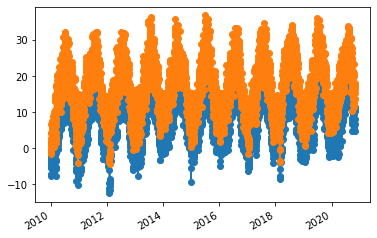

In [53]:
plt.plot(idojaras['date'], idojaras['MinimumTemperature'], marker='o')
plt.plot(idojaras['date'], idojaras['MaximumTemperature'], marker='o')
plt.gcf().autofmt_xdate()
plt.show()

A fenti pontdiagramon a sok adat miatt nem túl jól látszanak az adatok; megnézünk egy másik diagrammot, de csak az első 20 adatra:

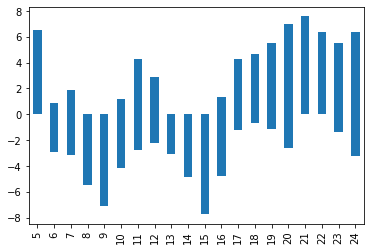

In [54]:
idojaras['MaximumTemperature'].head(20).plot(kind='bar')
idojaras['MinimumTemperature'].head(20).plot(kind='bar')
plt.show()

Gyakoriságot is nézhetünk max hőmérsékletre:

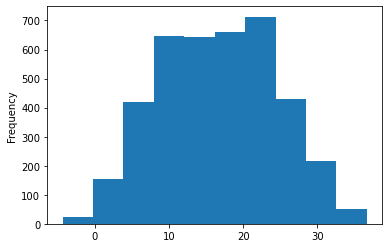

In [55]:
idojaras['MaximumTemperature'].plot.hist()
plt.show()

Vonaldiagram is hasonlót mutat:

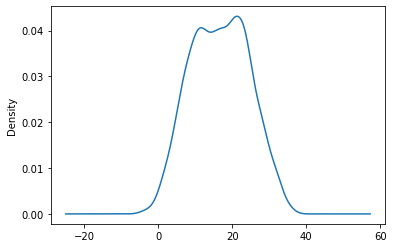

In [56]:
idojaras['MaximumTemperature'].plot.density()
plt.show()

# Regresszió

Szükséges csomagok beolvasása:

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Adatelőkészítés (függő és független változók, tréning és teszt halmazok kialakítása)

In [58]:
# Függő és független változók:
X = idojaras[['MeanRelative Humidity', 'Mean Sea Level Pressure', 'MeanWind Speed']]

y = idojaras['SummationPrecipitation Total']

# Test és training adatok létrehozása
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Példányosítás és tanítás:

In [60]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Az illesztett modell paraméterei

In [61]:
df_coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
df_coeff

,Coefficient
MeanRelative Humidity,0.104904
Mean Sea Level Pressure,-0.107579
MeanWind Speed,0.040695


A csapadékképződést a legjobban a páratartalom befolyásolja. A légnyomás majdnem ugyanolyan mértékben befolyásolja; persze ennek fordított irányú változása. A pontos értékek a fenti táblázatból kiolvashatóak.
Érdekes, hogy a szélsebesség is kb negyed ilyen mértékben befolyásolja a csapadékképződést.
Összességében komolyan nem befolyásolja a csapadékképződést a megadott 3 adat. :(

Megnézzük milyen az előrejelzést a teszt halmazon a modell alapján:

In [62]:
y_pred = regressor.predict(X_test)

pd.set_option('display.max_rows', None)
df_prediction_MLR = pd.DataFrame({'Pontos érték': y_test, 'Előrejelzett': y_pred})
df_prediction_MLR

,Pontos érték,Előrejelzett
2287,1.100000,3.224896
1133,12.499999,3.900852
724,4.100000,2.968327
3719,0.300000,2.961517
1887,0.000000,1.048749
3255,0.100000,3.427221
492,2.400000,2.550856
1927,0.000000,-1.986869
1424,8.500001,3.826117
995,0.000000,1.387824


In [63]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)

Mean Absolute Error: 1.7421517617130067
Mean Squared Error: 9.569461556007052
Root Mean Squared Error: 3.093454631315457


Köszönöm a figyelmet! (pataki.miklos@gmail.com)